In [41]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [42]:
data = pd.read_csv("airline-passenger-traffic.csv", header=None)
data.columns = ["Month", "Passengers"]
data["Month"] = pd.to_datetime(data["Month"], format="%Y-%m")
data = data.set_index("Month")
data.head(12)

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0
1949-07-01,148.0
1949-08-01,148.0
1949-09-01,136.0


In [43]:
data.shape

(144, 1)

## Time Series Analysis

#### Plot time series data

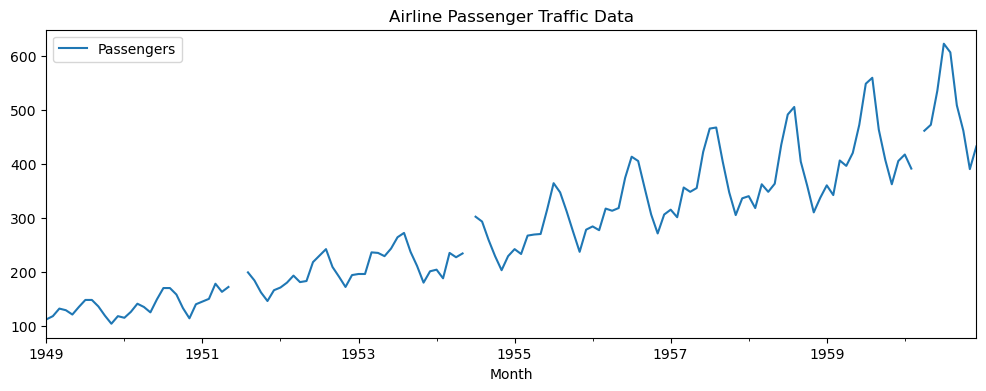

In [44]:
data.plot(figsize=([12,4]))
plt.legend(loc='best')
plt.title('Airline Passenger Traffic Data')
plt.show()

### Missing Value Treatment

#### Mean Imputation

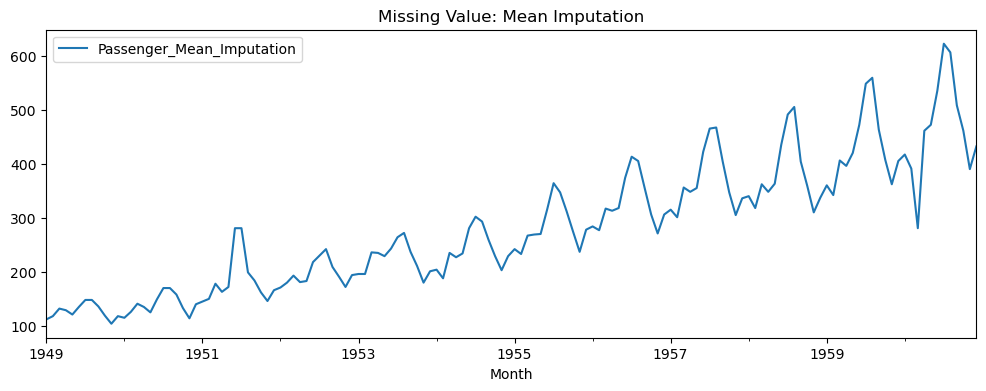

In [45]:
# help(data.assign)
data = data.assign(Passenger_Mean_Imputation=data.Passengers.fillna(data.Passengers.mean()))
data[["Passenger_Mean_Imputation"]].plot(figsize=(12,4))
plt.title('Missing Value: Mean Imputation')
plt.show()

#### Linear Interpolation

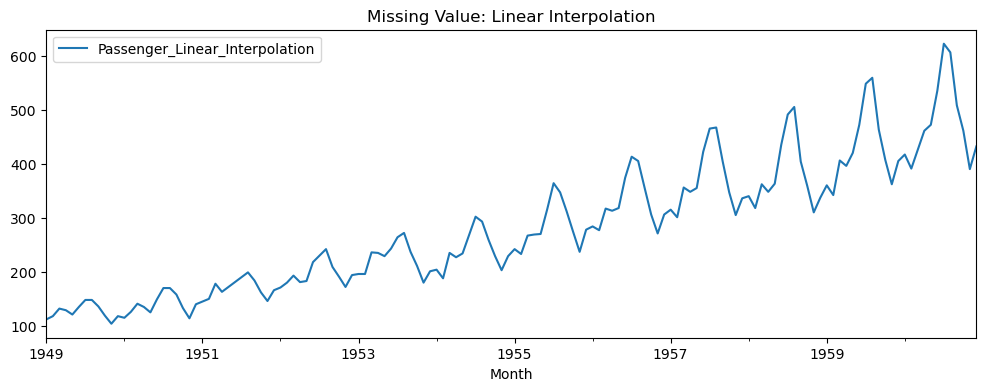

In [46]:
data = data.assign(Passenger_Linear_Interpolation=data.Passengers.interpolate(method='linear'))
data[["Passenger_Linear_Interpolation"]].plot(figsize=[12,4])
plt.legend(loc='best')
plt.title("Missing Value: Linear Interpolation")
plt.show()

#### Use linear interpolate to impute missing values

In [47]:
data["Passengers"] = data["Passenger_Linear_Interpolation"]

### Detecting Outliers

#### Boxplot

In [48]:
import seaborn as sns

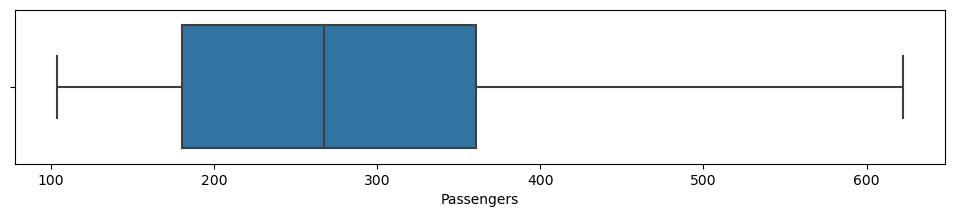

In [49]:
fig = plt.subplots(figsize=([12,2]))
ax = sns.boxplot(x=data["Passengers"], whis=1.5)

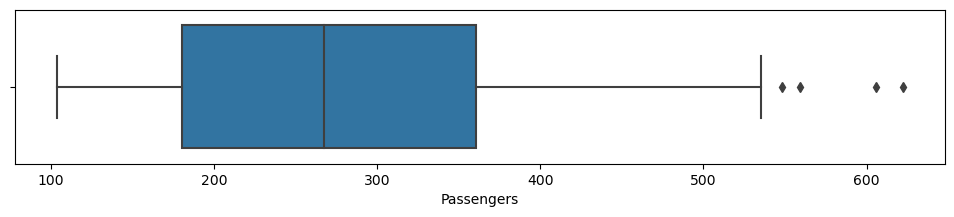

In [50]:
fig = plt.subplots(figsize=([12,2]))
ax = sns.boxplot(x=data["Passengers"], whis=1)

#### Histogram Plot

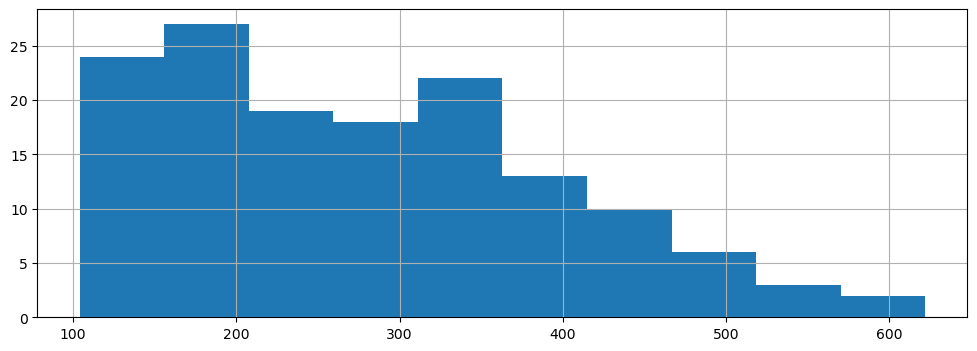

In [51]:
fig = data.Passengers.hist(figsize=([12,4]))

No outliers detected in the data.

### Time Series Decomposition

#### Additive Seasonal Component

In [52]:
from pylab import rcParams
import statsmodels.api as sm

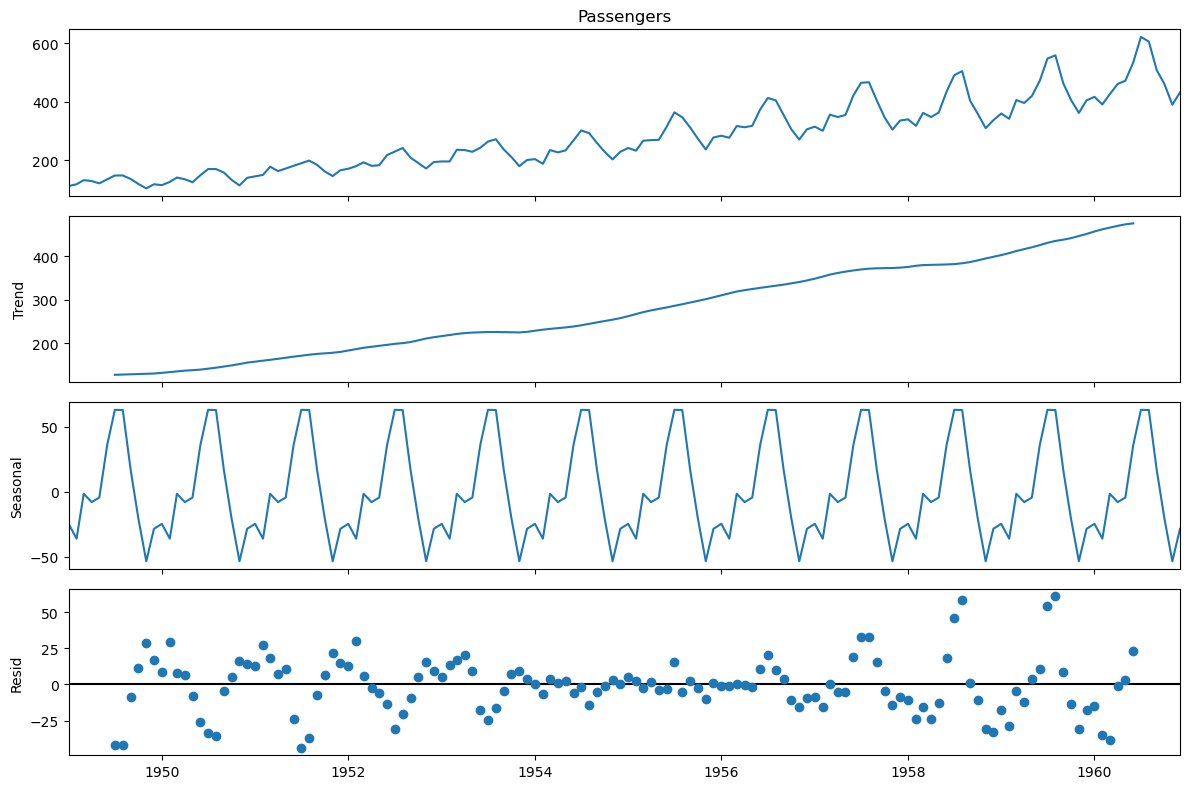

In [53]:
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='additive')
fig = decomposition.plot()
plt.show()

* The residual component is still having some pattern, which means Additive decomposition was not able to extract some part of seasonality. 

#### Multiplicative Seasonal Component

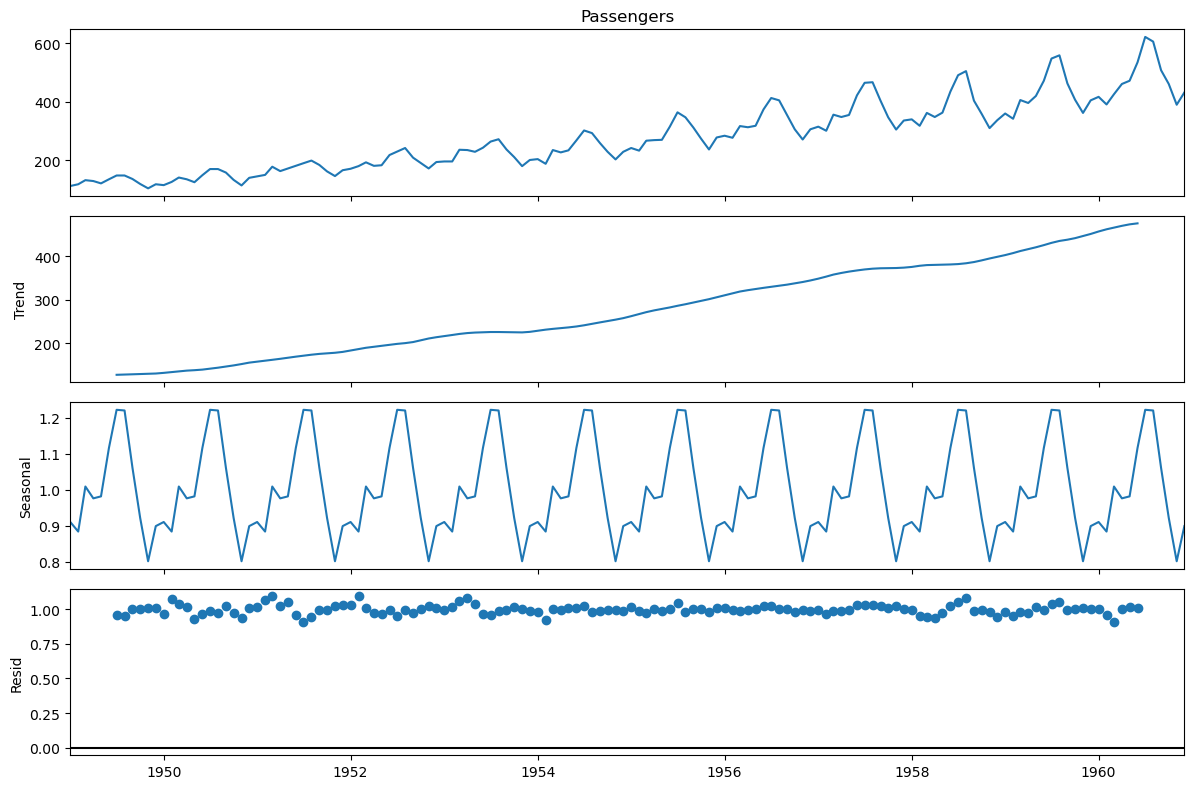

In [54]:
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='multiplicative')
fig = decomposition.plot()
plt.show()

### Build & Evaluate Time Series Forecast   

### Smoothing Techniques

* Splitting Time Series into Training & Test Sets

In [55]:
train_len = 120
train = data[0:train_len]
test = data[train_len:]

#### Naive Method

In [56]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Passengers'][train_len-1]

##### Plot train, test & forecast 

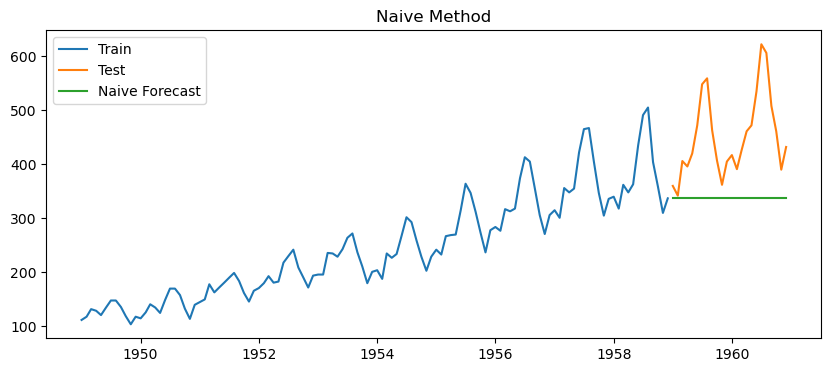

In [57]:
plt.figure(figsize=(10,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Method")
plt.show()

##### Calculate RMSE & MAPE to Evaluate Forecast

In [58]:
from sklearn.metrics import mean_squared_error

In [59]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers'] - y_hat_naive['naive_forecast'])/test['Passengers'])*100, 2)

results = pd.DataFrame({
    'Method':['Naive method'],
    'RMSE':[rmse],
    'MAPE':[mape]
})
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63


#### Simple Average Method

In [60]:
y_hat_avg = test.copy()
y_hat_avg["avg_forecast"] = train["Passengers"].mean()

##### Plot train, test & forecast 

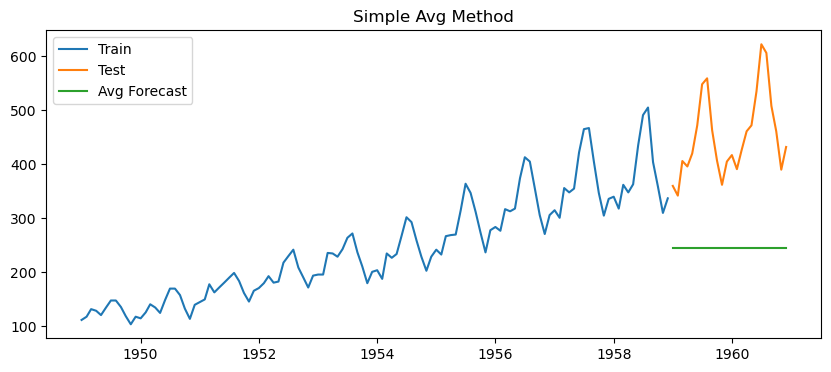

In [61]:
plt.figure(figsize=[10,4])
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Avg Forecast')
plt.legend(loc='best')
plt.title("Simple Avg Method")
plt.show()

##### Calculate RMSE & MAPE to Evaluate Forecast

In [62]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_avg["avg_forecast"])).round(2)
mape = (np.mean(np.abs(test['Passengers'] - y_hat_avg["avg_forecast"])/test['Passengers'])*100).round(2)

tempResults = pd.DataFrame({
    'Method' : ['Simple Average Method'],
    'RMSE' : [rmse],
    'MAPE' : [mape]
})

results = pd.concat([results,tempResults]) 
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple Average Method,219.69,44.28


#### Simple Moving Average

In [63]:
y_hat_sma = data.copy()
ma_window = 12
# y_hat_sma['Passengers1'] = y_hat_sma['Passengers'][:train_len]
# y_hat_sma['sma_forecast'] = y_hat_sma['Passengers1'].rolling(ma_window, min_periods=6).mean()
y_hat_sma['sma_forecast'] = data['Passengers'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

##### Plot Train, Test & Forecast

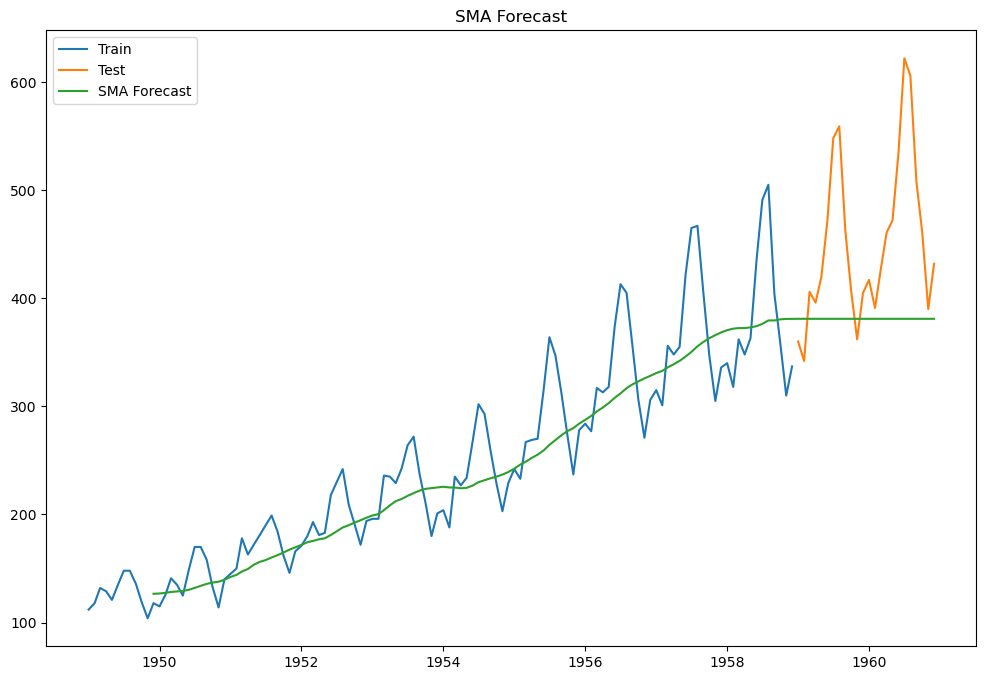

In [64]:
plt.figure(figsize=[12,8])
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='SMA Forecast')
plt.legend(loc='best')
plt.title('SMA Forecast')
plt.show()

In [65]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = (np.mean(np.abs(test['Passengers'] - y_hat_sma['sma_forecast'][train_len:])/test['Passengers'])*100).round(2)

tempResults = pd.DataFrame({
    'Method' : ['Simple Moving Method'],
    'RMSE' : [rmse],
    'MAPE' : [mape]
})
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple Average Method,219.69,44.28
0,Simple Moving Method,103.33,15.54


#### Simple Exponential Smoothing

In [66]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [67]:
model = SimpleExpSmoothing(train['Passengers'])
model_fit = model.fit(smoothing_level=0.2, optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses["ses_forecast"] = model_fit.forecast(24)

In [68]:
test.shape

(24, 3)

##### Plot Train, Test & Forecast

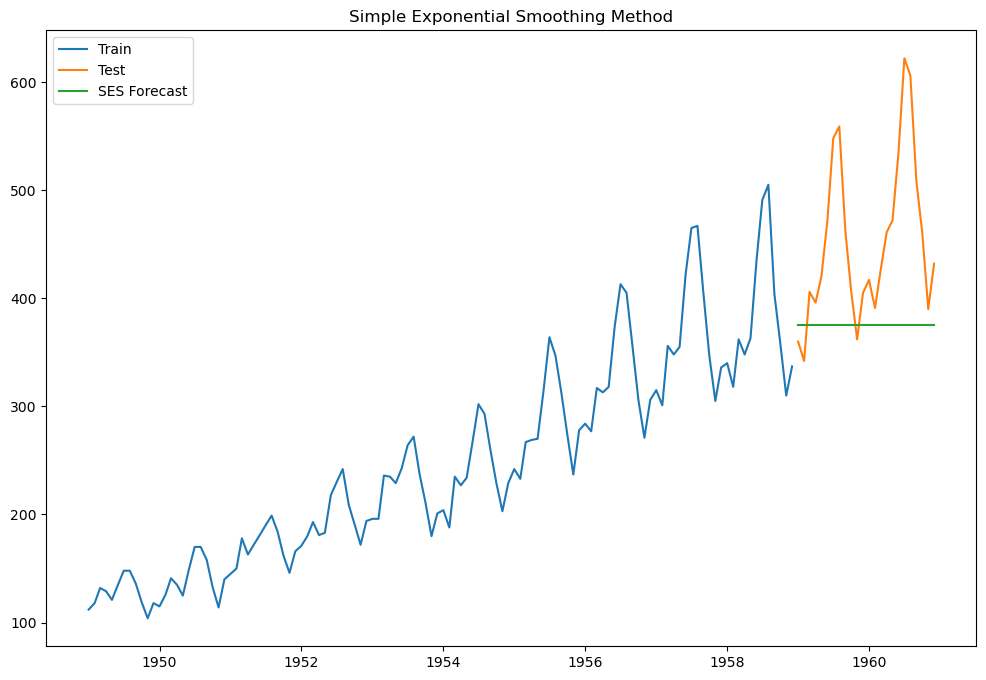

In [69]:
plt.figure(figsize=[12,8])
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='SES Forecast')
plt.legend(loc='best')
plt.title("Simple Exponential Smoothing Method")
plt.show()

In [70]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ses['ses_forecast'])).round(2)
mape = (np.mean(np.abs(test['Passengers']-y_hat_ses['ses_forecast'])/test['Passengers'])*100).round(2)

tempResults = pd.DataFrame({
    'Method' : ['Simple Exponential Method'],
    'RMSE' : [rmse],
    'MAPE' : [mape]
})
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple Average Method,219.69,44.28
0,Simple Moving Method,103.33,15.54
0,Simple Exponential Method,107.65,16.49


#### Holt's Exponential Smoothing Method with Trend

In [71]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [72]:
model = ExponentialSmoothing(np.asarray(train['Passengers']), trend='add', seasonal_periods=12)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False) 
# smaller value of smoothing_slope(beta) avoids seasonal fluctuations
# lower value of beta captures the long-term trend
# higher value of beta captures the short-term trend
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 118.4666666666666, 'initial_trend': 2.060606060606069, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


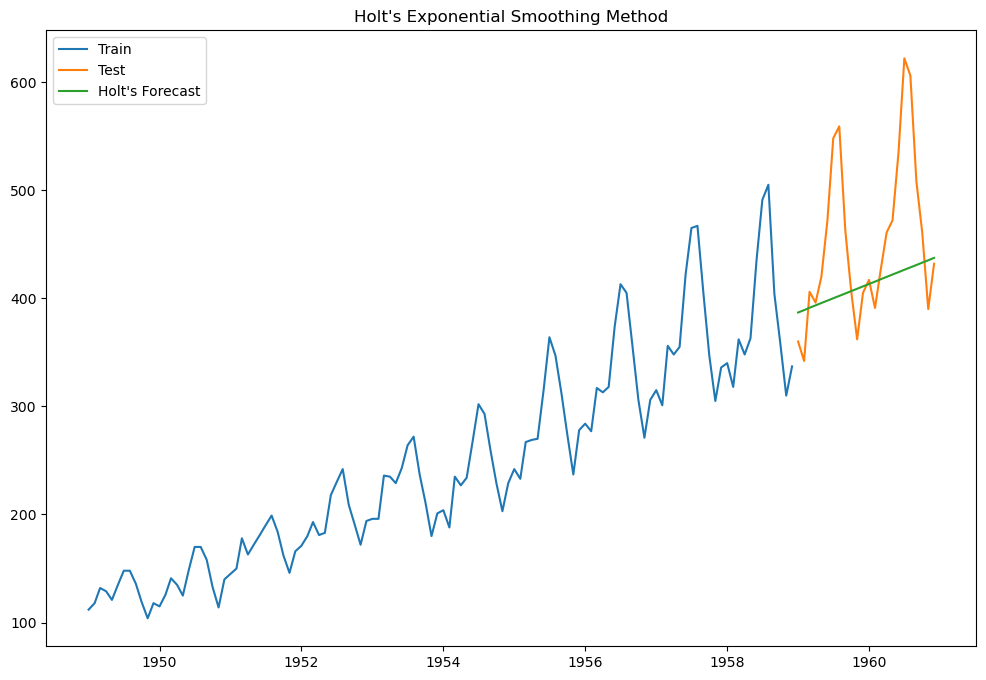

In [73]:
plt.figure(figsize=[12,8])
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s Forecast')
plt.legend(loc='best')
plt.title("Holt's Exponential Smoothing Method")
plt.show()

In [74]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_holt['holt_forecast'])).round(2)
mape = (np.mean(np.abs(test['Passengers']-y_hat_holt['holt_forecast'])/test['Passengers'])*100).round(2)

tempResults = pd.DataFrame({
    'Method' : ['Holt Exponential Method'],
    'RMSE' : [rmse],
    'MAPE' : [mape]
})
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple Average Method,219.69,44.28
0,Simple Moving Method,103.33,15.54
0,Simple Exponential Method,107.65,16.49
0,Holt Exponential Method,80.91,11.39


#### Holt Winter's Additive Method with Trend & Seasonality

$ Y_{t+1} = l_t + b_t + S_{t+1-m} $
<br> Here,
<br> $m$ is the number of times a season repeats during a period
<br> $ S_t = \gamma*(y_t - l_{t-1} - b_{t-1}) + (1-\gamma)*S_{t-m} $
<br> $ b_t = \beta*(l_t - l_{t-1}) + (1-\beta)*b_{t-1} $
<br> $ l_t = \alpha*(y_t - S_{t-m}) + (1-\alpha)*(l_{t-1} + b_{t-1}) $
<br>

<br> $ y_t $ : Current Observation
<br> $ y_{t+1} $ : Next Expected Observation
<br> $ l_t $ : Level Component
<br> $ b_t $ : Trend Component
<br> $ S_t $ : Seasonal Component
<br> $ \alpha $ : Weight assigned to Level Component  => $ 0 < \alpha < 1$
<br> $ \beta $ : Weight assigned to Trend Component   => $ 0 < \beta < 1$
<br> $ \gamma $ : Weight assigned to Seasonal Component   => $ 0 < \gamma < 1$
<br> $ (y_t - l_{t-1} - b_{t-1}) $ : best guess of seasonal effect in the immediate time period
<br>


In [75]:
model = ExponentialSmoothing(np.asarray(train['Passengers']), trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa = test.copy()
y_hat_hwa['hwa_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.2361171978116132, 'smoothing_trend': 7.679615363850196e-11, 'smoothing_seasonal': 0.7638828018270181, 'damping_trend': nan, 'initial_level': 119.14045289095831, 'initial_trend': 2.2766888689244404, 'initial_seasons': array([ -9.41693238,  -3.89040624,   8.62486483,   3.53570972,
        -5.16150036,   8.98263745,  21.24863145,  19.32984306,
         5.24250075, -13.60564542, -28.28759186, -12.13664608]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


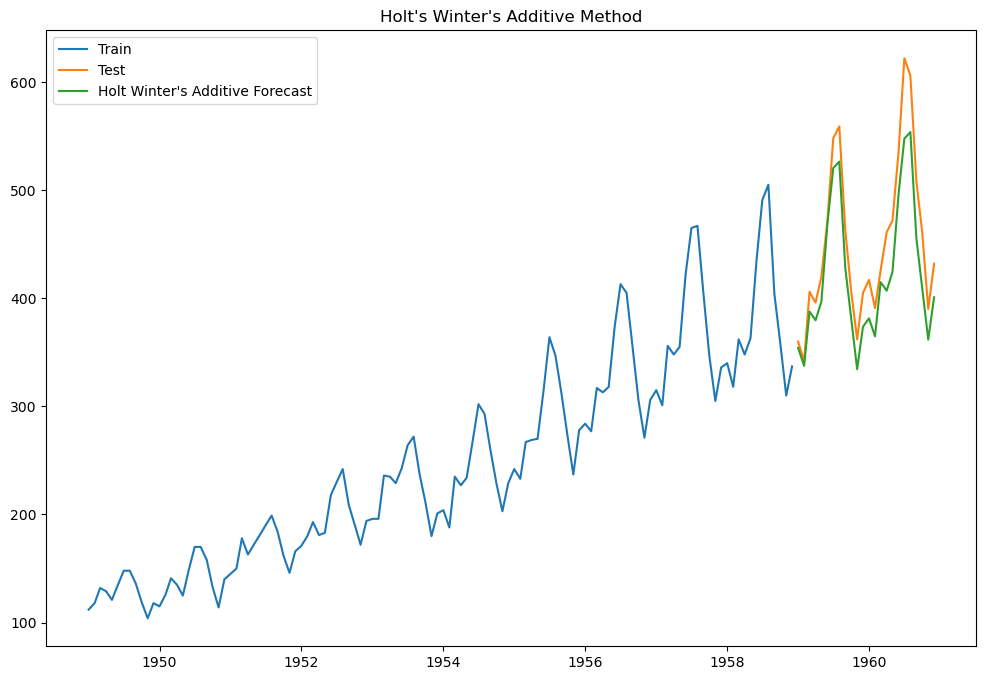

In [76]:
plt.figure(figsize=[12,8])
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_hwa['hwa_forecast'], label='Holt Winter\'s Additive Forecast')
plt.legend(loc='best')
plt.title("Holt's Winter\'s Additive Method")
plt.show()

In [77]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_hwa['hwa_forecast'])).round(2)
mape = (np.mean(np.abs(test['Passengers']-y_hat_hwa['hwa_forecast'])/test['Passengers'])*100).round(2)

tempResults = pd.DataFrame({
    'Method' : ['Holt Winter\'s Additive Method'],
    'RMSE' : [rmse],
    'MAPE' : [mape]
})
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple Average Method,219.69,44.28
0,Simple Moving Method,103.33,15.54
0,Simple Exponential Method,107.65,16.49
0,Holt Exponential Method,80.91,11.39
0,Holt Winter's Additive Method,35.87,6.72


#### Holt Winter's Multiplicative Method with Trend & Seasonality

In [78]:
model = ExponentialSmoothing(np.asarray(train['Passengers']), trend='mul', seasonal='mul', seasonal_periods=12)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm = test.copy()
y_hat_hwm['hwm_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.3863442679018671, 'smoothing_trend': 1.8061438231937075e-09, 'smoothing_seasonal': 0.6136557316369492, 'damping_trend': nan, 'initial_level': 110.84662595206673, 'initial_trend': 1.009663306939697, 'initial_seasons': array([1.00073971, 1.0572128 , 1.16732649, 1.10715476, 1.01524717,
       1.11167911, 1.21361244, 1.20645475, 1.09715002, 0.95080144,
       0.84217555, 0.98245748]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


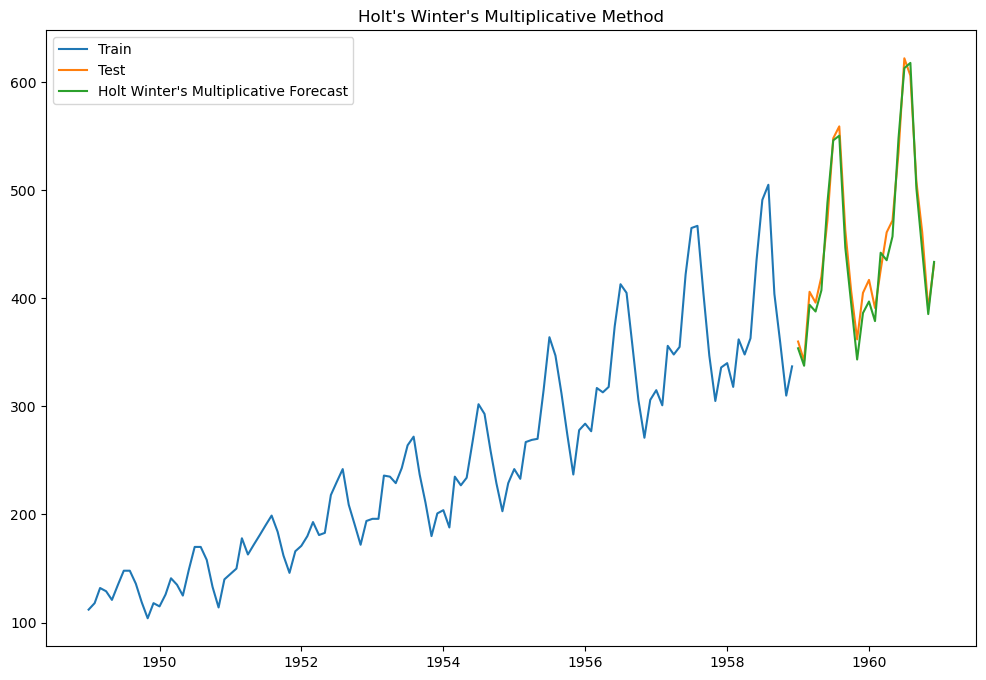

In [79]:
plt.figure(figsize=[12,8])
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_hwm['hwm_forecast'], label='Holt Winter\'s Multiplicative Forecast')
plt.legend(loc='best')
plt.title("Holt's Winter\'s Multiplicative Method")
plt.show()

In [80]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_hwm['hwm_forecast'])).round(2)
mape = (np.mean(np.abs(test['Passengers']-y_hat_hwm['hwm_forecast'])/test['Passengers'])*100).round(2)

tempResults = pd.DataFrame({
    'Method' : ['Holt Winter\'s Multiplicative Method'],
    'RMSE' : [rmse],
    'MAPE' : [mape]
})
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple Average Method,219.69,44.28
0,Simple Moving Method,103.33,15.54
0,Simple Exponential Method,107.65,16.49
0,Holt Exponential Method,80.91,11.39
0,Holt Winter's Additive Method,35.87,6.72
0,Holt Winter's Multiplicative Method,13.36,2.71
